In [1]:
import warnings
warnings.filterwarnings('ignore')

#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#data
print('*******************Dataset Info************************')
print(data.info())
print('*******************DataSet Shape***********************')
print(data.shape)
print('*********************Describe**************************')
print(data.describe())
print('*******************Number of nulls*********************')
print(data.isnull().sum())
print('*******************************************************')

*******************Dataset Info************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
*******************DataSet Shape******

- There are Object Data Type features are present. Need to encode them to 0,1 using One hot encoding.
- Few features have values like Unknown.
- There are no missing values.



In [4]:
#Convert Day to Category as it's numerical value is not relevant
data['day']=data['day'].astype('category')

#Convert Target to Category as it's Object type
data['Target']=data['Target'].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  object  
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  category
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  Target     45211 non-null  category
dtypes: category(2), int64(6), object(9)
memory usage: 5.3+ MB
None


In [5]:
#Check the unique values of Job feature
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
data.drop(data[data.job=="unknown"].index,axis=0,inplace=True)

In [7]:
#Check the uniqe values of marital
data.marital.value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [8]:
data.education.value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education, dtype: int64

In [9]:
#There are 1822 rows with missing education data. So can remove these rows.
data.drop(data[data.education=="unknown"].index,axis=0,inplace=True)

In [10]:
data.default.value_counts()

no     42411
yes      782
Name: default, dtype: int64

In [11]:
data.contact.value_counts()

cellular     28213
unknown      12286
telephone     2694
Name: contact, dtype: int64

In [12]:
#There are high number of unknown entries in `contact`. It's better to drop the entire column.
data.drop("contact",axis=1,inplace=True)

In [13]:
data.month.value_counts()

may    13192
jul     6601
aug     6037
jun     4980
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: month, dtype: int64

In [14]:
data.poutcome.value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: poutcome, dtype: int64

In [15]:
#There are high number of unkown entries in `poutcome` attribute. It's better to drop the column.
data.drop("poutcome",axis=1,inplace=True)

In [16]:
data.describe()

,age,balance,duration,campaign,pdays,previous
count,"43,193.0000","43,193.0000","43,193.0000","43,193.0000","43,193.0000","43,193.0000"
mean,40.7641,"1,354.0273",258.3234,2.7582,40.4041,0.5849
std,10.5126,"3,042.1036",258.1620,3.0640,100.4206,2.3327
min,18.0000,"-8,019.0000",0.0000,1.0000,-1.0000,0.0000
25%,33.0000,71.0000,103.0000,1.0000,-1.0000,0.0000
50%,39.0000,442.0000,180.0000,2.0000,-1.0000,0.0000
75%,48.0000,"1,412.0000",318.0000,3.0000,-1.0000,0.0000
max,95.0000,"102,127.0000","4,918.0000",58.0000,871.0000,275.0000


There are few outliers in numerical attributes.

1. "balance" column has a minimum value of -8019 which is negative, but the average annual balance should not be negative. This either can be a typo or an outlier.
2. There is a significant difference in 75% and max values of "age" attribute.
3. Similarly, there are outliers in "duration" and "campaign".
4. "previous" and "pdays" have majority of entries with -1 or 0 (missing data or client not contacted), we can drop this column.

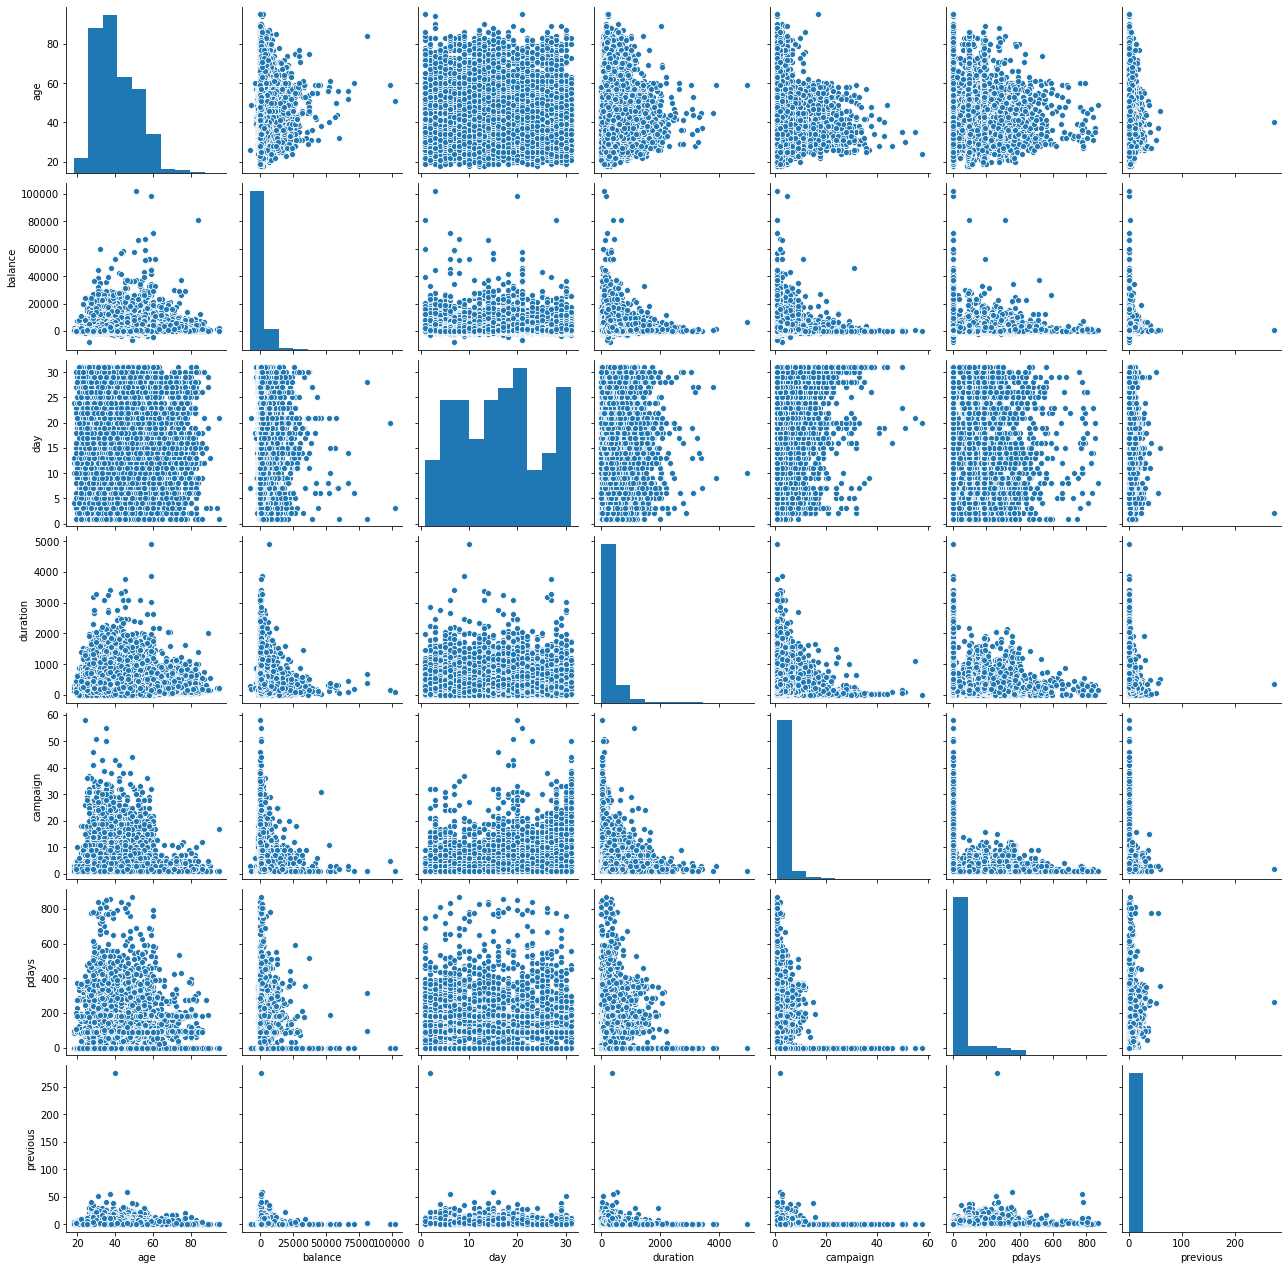

In [17]:
sns.pairplot(data)

The distribution of all numerical variables other than age is highly skewed - hence we might want to transform or bin some of these variables

*** Check Presence of the outliers

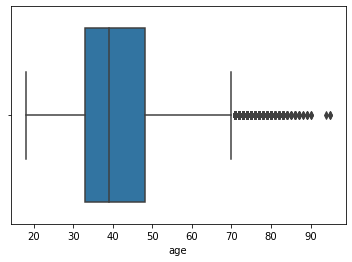

In [18]:
sns.boxplot(data["age"])
plt.show()

In [19]:
data.age.max()

95

In [20]:
data.age.min()

18

In [21]:
#both max and min ages (95,18) are realistic, and thus, we won't remove them

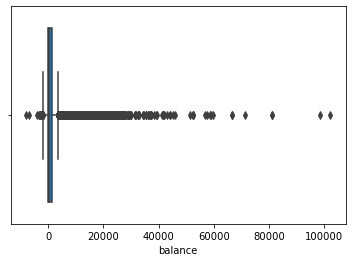

In [22]:
sns.boxplot(data["balance"])
plt.show()

In [23]:
data.balance.mean()

1354.0273423934434

In [24]:
data["balance_outliers"] = zscore(data["balance"])
data.drop(data[(data["balance_outliers"]>3) | (data["balance_outliers"] < -3)].index,axis=0,inplace=True)

In [25]:
# We don't need the zscore column anymore
data.drop("balance_outliers",axis=1,inplace=True)

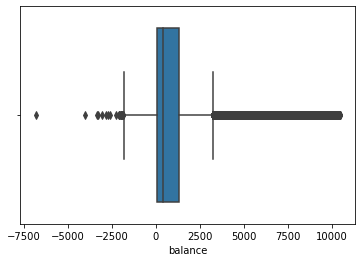

In [26]:
sns.boxplot(data["balance"])
plt.show()

In [27]:
sum(data.balance<-2500)

8

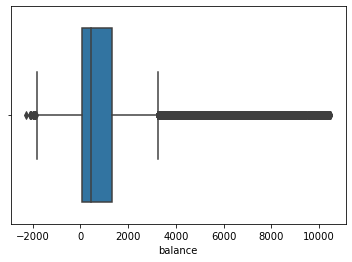

In [28]:
data.drop(data[data.balance<-2500].index,axis=0,inplace=True)
sns.boxplot(data["balance"])
plt.show()

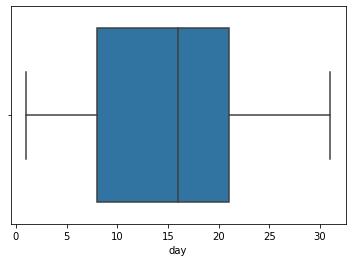

In [29]:
sns.boxplot(data["day"])
plt.show()

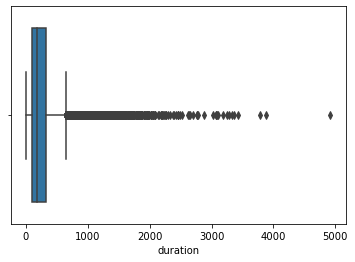

In [30]:
sns.boxplot(data["duration"])
plt.show()

We know that duration is not known in advance and by the end of the call, when we know the duration, we also know the result. So, we can drop this attribute.

In [31]:
data.drop("duration",axis=1,inplace=True)

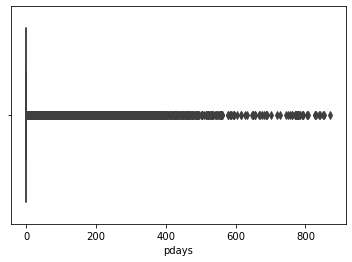

In [32]:
sns.boxplot(data["pdays"])
plt.show()

Because of the unbalanced distribution in value ranges for pdays attribute, it's better drop it.

In [33]:
data.drop("pdays",axis=1,inplace=True)

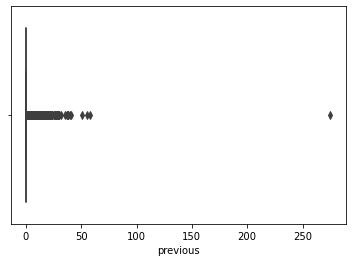

In [34]:
sns.boxplot(data["previous"])
plt.show()

In [35]:
sum(data.previous>50)

4

In [36]:
sum(data.previous ==0)

34703

In [37]:
sum(data.previous > 0)

7773

*** There are very few records has values, rest of them are 0 so better to drop it

In [38]:
data.drop("previous",axis=1,inplace=True)

In [39]:
data.shape

(42476, 12)

In [40]:
data['job'].value_counts()

blue-collar      9194
management       8950
technician       7249
admin.           4948
services         3980
retired          2092
self-employed    1497
entrepreneur     1379
unemployed       1253
housemaid        1171
student           763
Name: job, dtype: int64

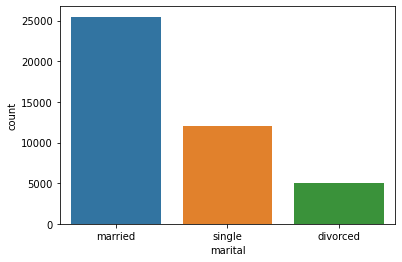

In [41]:
sns.countplot(data['marital']);

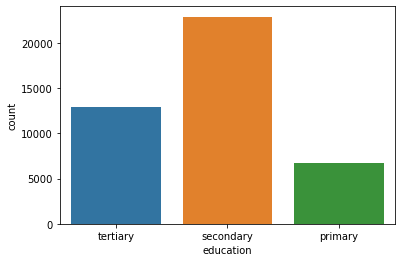

In [42]:
sns.countplot(data['education']);

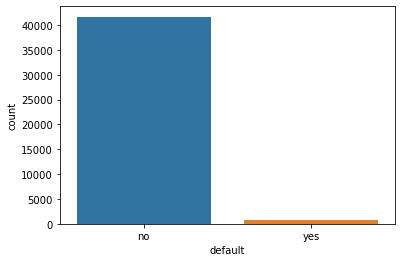

In [43]:
sns.countplot(data['default']);

In [44]:
#**default - yes is a very small % - we can consider deleting this column**

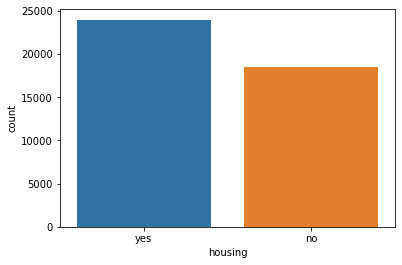

In [45]:
sns.countplot(data['housing']);

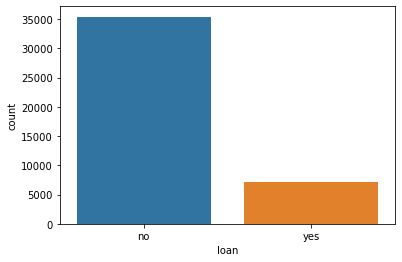

In [46]:
sns.countplot(data['loan']);

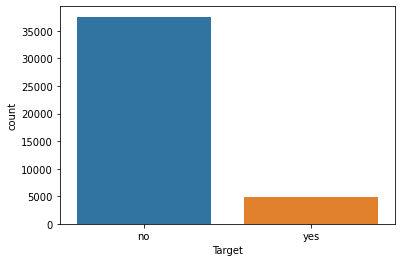

In [47]:
sns.countplot(data['Target']);

In [48]:
data['Target'].value_counts(normalize=True)

no    0.8845
yes   0.1155
Name: Target, dtype: float64

### The response rate is only 11.6%. Hence the Y variable has a high class imbalance. Hence accuracy will not be a reliable model performance measure. 

### FN is very critical for this business case because a false negative is a customer who will potentially subscribe for a loan but who has been classified as 'will not subscribe'. Hence the most relevant model performance measure is recall

## Bivariate analysis

In [49]:
data.groupby(["Target"]).mean()

,age,balance,campaign
Target,,,
no,40.6152,"1,032.3108",2.8403
yes,41.4137,"1,422.3848",2.1429


#### The mean balance is higher for customers who subscribe to the term deposit compared to those who dont


#### number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed

#### number of contacts performed before this campaign is also higher for customers who subscribe


### All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit

In [50]:
pd.crosstab(data['job'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
job,,
student,0.7077,0.2923
retired,0.7744,0.2256
unemployed,0.8420,0.1580
management,0.8649,0.1351
admin.,0.8783,0.1217
self-employed,0.8838,0.1162
technician,0.8902,0.1098
housemaid,0.9120,0.0880
services,0.9126,0.0874


*** The highest conversion is for students (28%) and lowest is for blue-collar(7%)

In [51]:
pd.crosstab(data['marital'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
marital,,
single,0.8523,0.1477
divorced,0.8822,0.1178
married,0.9001,0.0999


In [52]:
pd.crosstab(data['education'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
education,,
tertiary,0.8507,0.1493
secondary,0.8948,0.1052
primary,0.9142,0.0858


In [53]:
pd.crosstab(data['default'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
default,,
no,0.8835,0.1165
yes,0.9381,0.0619


In [54]:
data['default'].value_counts(normalize=True)

no    0.9818
yes   0.0182
Name: default, dtype: float64

In [55]:
### Since default - yes is only 2% of the data and the conversion is also comparitively lower for default - yes, we can remove this column
data.drop(['default'], axis=1, inplace=True)

In [56]:
data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'campaign', 'Target'],
      dtype='object')

In [57]:
pd.crosstab(data['housing'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
housing,,
no,0.8342,0.1658
yes,0.9232,0.0768


In [58]:
pd.crosstab(data['loan'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
loan,,
no,0.8747,0.1253
yes,0.9336,0.0664


In [59]:
pd.crosstab(data['day'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
day,,
1,0.7211,0.2789
10,0.7778,0.2222
30,0.8265,0.1735
3,0.8309,0.1691
22,0.8376,0.1624
4,0.8417,0.1583
25,0.8474,0.1526
13,0.8483,0.1517
12,0.8490,0.1510


In [60]:
pd.crosstab(data['month'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
month,,
mar,0.4624,0.5376
sep,0.5261,0.4739
dec,0.5436,0.4564
oct,0.5633,0.4367
apr,0.8094,0.1906
feb,0.8367,0.1633
aug,0.8919,0.1081
jun,0.8944,0.1056
nov,0.8981,0.1019


### Data Preperation

In [61]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [62]:
# One hot embedding and remove original job column
data = pd.concat([data,
                    pd.get_dummies(data.job,drop_first=True)
                   ], axis=1).drop("job",axis=1)
data.head()

,age,marital,education,balance,housing,loan,day,month,campaign,Target,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,married,tertiary,2143,yes,no,5,may,1,no,0,0,0,1,0,0,0,0,0,0
1,44,single,secondary,29,yes,no,5,may,1,no,0,0,0,0,0,0,0,0,1,0
2,33,married,secondary,2,yes,yes,5,may,1,no,0,1,0,0,0,0,0,0,0,0
5,35,married,tertiary,231,yes,no,5,may,1,no,0,0,0,1,0,0,0,0,0,0
6,28,single,tertiary,447,yes,yes,5,may,1,no,0,0,0,1,0,0,0,0,0,0


In [63]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [64]:
# Perform one hot embedding and remove original marital column
data = pd.concat([data,
                    pd.get_dummies(data.marital,drop_first=True)
                   ], axis=1).drop("marital",axis=1)
data.head()

,age,education,balance,housing,loan,day,month,campaign,Target,blue-collar,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single
0,58,tertiary,2143,yes,no,5,may,1,no,0,...,0,1,0,0,0,0,0,0,1,0
1,44,secondary,29,yes,no,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
2,33,secondary,2,yes,yes,5,may,1,no,0,...,0,0,0,0,0,0,0,0,1,0
5,35,tertiary,231,yes,no,5,may,1,no,0,...,0,1,0,0,0,0,0,0,1,0
6,28,tertiary,447,yes,yes,5,may,1,no,0,...,0,1,0,0,0,0,0,0,0,1


In [65]:
data.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [66]:
# Perform one hot embedding and remove original education column
data = pd.concat([data,
                    pd.get_dummies(data.education,drop_first=True)
                   ], axis=1).drop("education",axis=1)
data.head()

,age,balance,housing,loan,day,month,campaign,Target,blue-collar,entrepreneur,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,2143,yes,no,5,may,1,no,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,yes,no,5,may,1,no,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,yes,yes,5,may,1,no,0,1,...,0,0,0,0,0,0,1,0,1,0
5,35,231,yes,no,5,may,1,no,0,0,...,0,0,0,0,0,0,1,0,0,1
6,28,447,yes,yes,5,may,1,no,0,0,...,0,0,0,0,0,0,0,1,0,1


In [67]:
data.housing.unique()

array(['yes', 'no'], dtype=object)

In [68]:
data.housing = data.housing.map({"yes":1,"no":0})
data.head()

,age,balance,housing,loan,day,month,campaign,Target,blue-collar,entrepreneur,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,2143,1,no,5,may,1,no,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,no,5,may,1,no,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,yes,5,may,1,no,0,1,...,0,0,0,0,0,0,1,0,1,0
5,35,231,1,no,5,may,1,no,0,0,...,0,0,0,0,0,0,1,0,0,1
6,28,447,1,yes,5,may,1,no,0,0,...,0,0,0,0,0,0,0,1,0,1


In [69]:
data.loan = data.loan.map({"yes":1,"no":0})
data.head()

,age,balance,housing,loan,day,month,campaign,Target,blue-collar,entrepreneur,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,2143,1,0,5,may,1,no,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,may,1,no,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,may,1,no,0,1,...,0,0,0,0,0,0,1,0,1,0
5,35,231,1,0,5,may,1,no,0,0,...,0,0,0,0,0,0,1,0,0,1
6,28,447,1,1,5,may,1,no,0,0,...,0,0,0,0,0,0,0,1,0,1


In [70]:
data.Target = data.Target.map({"yes":1,"no":0})
data.head()

,age,balance,housing,loan,day,month,campaign,Target,blue-collar,entrepreneur,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,2143,1,0,5,may,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,may,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,may,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
5,35,231,1,0,5,may,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,28,447,1,1,5,may,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [71]:
# Perform one hot embedding and remove original month column
data = pd.concat([data,
                    pd.get_dummies(data.month,drop_first=True)
                   ], axis=1).drop("month",axis=1)
data.head()

,age,balance,housing,loan,day,campaign,Target,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,2143,1,0,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,1,0,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,1,1,5,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,35,231,1,0,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,28,447,1,1,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
data.shape

(42476, 32)

### Model Building

In [73]:
# Separating dependent and independent variables
X = data.drop(['Target'], axis = 1)
y = data['Target']

# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29733, 31), (12743, 31), (29733,), (12743,))

### Logistic Regression Classifier

In [75]:
lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)
print(lr.score(X_train, y_train))
lr_acc=lr.score(X_test, y_test)
print(lr_acc)
predictionsLR = lr.predict(X_test)
print('Logistic Regression:',accuracy_score(y_test, predictionsLR))
# confusion matrix
cmLR = confusion_matrix(y_test, predictionsLR)
print(cmLR)
# classification report
print(classification_report(y_test, predictionsLR))

0.8850435542999361
0.8828376363493683
Logistic Regression: 0.8828376363493683
[[11242     4]
 [ 1489     8]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11246
           1       0.67      0.01      0.01      1497

    accuracy                           0.88     12743
   macro avg       0.77      0.50      0.47     12743
weighted avg       0.86      0.88      0.83     12743



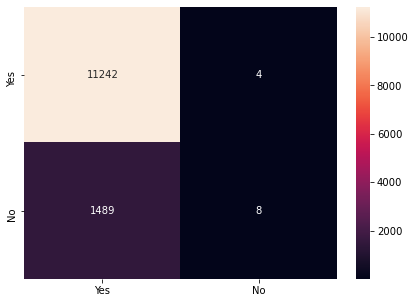

In [76]:
df_cmLR = pd.DataFrame(cmLR, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmLR, annot=True ,fmt='g')

In [77]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': lr_acc})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.8828


### Decision Tree Classifies

In [78]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTree.fit(X_train,y_train)
print(dTree.score(X_train, y_train))
dt_acc=dTree.score(X_test, y_test)
print(dt_acc)
predictionsDT = dTree.predict(X_test)
print('Decision Tree:',accuracy_score(y_test, predictionsDT))
# confusion matrix
cmDT = confusion_matrix(y_test, predictionsDT)
print(cmDT)
# classification report
print(classification_report(y_test, predictionsDT))

0.8869606161504052
0.8826806874362395
Decision Tree: 0.8826806874362395
[[11146   100]
 [ 1395   102]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11246
           1       0.50      0.07      0.12      1497

    accuracy                           0.88     12743
   macro avg       0.70      0.53      0.53     12743
weighted avg       0.84      0.88      0.84     12743



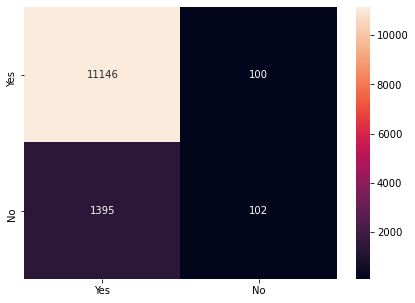

In [79]:
df_cmDT = pd.DataFrame(cmDT, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmDT, annot=True ,fmt='g')

In [80]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [dt_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.8828
0,Decision Tree,0.8827


### Ensemble Models

*** Bagging ***

In [81]:
bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
print(bgcl.score(X_train, y_train))
bg_acc=bgcl.score(X_test, y_test)
print(bg_acc)
predictionsBG = bgcl.predict(X_test)
print('Bagging Classifier ',accuracy_score(y_test, predictionsDT))
# confusion matrix
cmBG = confusion_matrix(y_test, predictionsBG)
print(cmBG)
# classification report
print(classification_report(y_test, predictionsDT))

0.9991591833989171
0.8831515341756259
Bagging Classifier  0.8826806874362395
[[11018   228]
 [ 1261   236]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11246
           1       0.50      0.07      0.12      1497

    accuracy                           0.88     12743
   macro avg       0.70      0.53      0.53     12743
weighted avg       0.84      0.88      0.84     12743



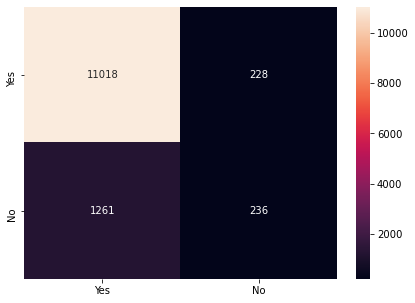

In [82]:
df_cmBG = pd.DataFrame(cmBG, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmBG, annot=True ,fmt='g')

In [83]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [bg_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.8828
0,Decision Tree,0.8827
0,Bagging,0.8832


*** AdaBoost ***

In [84]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)
print(abcl.score(X_train, y_train))
ab_acc=abcl.score(X_test, y_test)
print(ab_acc)
predictionsAB = abcl.predict(X_test)
print('AdaBoost Classifier ',accuracy_score(y_test, predictionsAB))
# confusion matrix
cmAB = confusion_matrix(y_test, predictionsAB)
print(cmBG)
# classification report
print(classification_report(y_test, predictionsAB))

0.8844381663471563
0.8830730597190615
AdaBoost Classifier  0.8830730597190615
[[11018   228]
 [ 1261   236]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11246
           1       0.52      0.08      0.13      1497

    accuracy                           0.88     12743
   macro avg       0.70      0.53      0.54     12743
weighted avg       0.85      0.88      0.84     12743



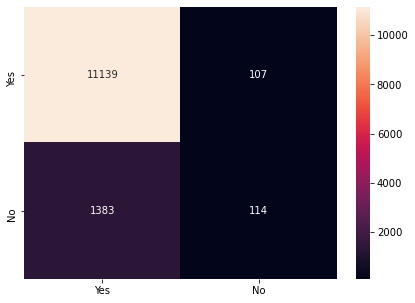

In [85]:
df_cmAB = pd.DataFrame(cmAB, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmAB, annot=True ,fmt='g')

In [86]:
tempResultsDf = pd.DataFrame({'Method':['Ada boost'], 'accuracy': [ab_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.8828
0,Decision Tree,0.8827
0,Bagging,0.8832
0,Ada boost,0.8831


*** Gradient Boost ***

In [87]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
print(gbcl.score(X_train, y_train))
gb_acc=gbcl.score(X_test, y_test)
print(gb_acc)
predictionsGB = gbcl.predict(X_test)
print('Gradient Classifier ',accuracy_score(y_test, predictionsGB))
# confusion matrix
cmGB = confusion_matrix(y_test, predictionsGB)
print(cmGB)
# classification report
print(classification_report(y_test, predictionsGB))

0.8887767800087445
0.8847210233069136
Gradient Classifier  0.8847210233069136
[[11184    62]
 [ 1407    90]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11246
           1       0.59      0.06      0.11      1497

    accuracy                           0.88     12743
   macro avg       0.74      0.53      0.52     12743
weighted avg       0.85      0.88      0.84     12743



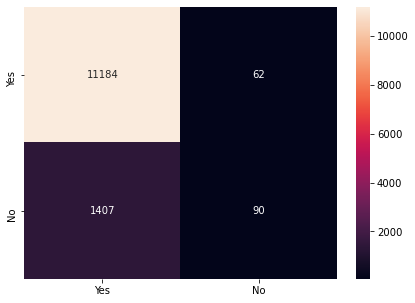

In [88]:
df_cmGB = pd.DataFrame(cmGB, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmGB, annot=True ,fmt='g')

In [89]:
tempResultsDf = pd.DataFrame({'Method':['Gradient boost'], 'accuracy': [gb_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.8828
0,Decision Tree,0.8827
0,Bagging,0.8832
0,Ada boost,0.8831
0,Gradient boost,0.8847


*** Random Forest Classifier ***

In [90]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_train, y_train))
rf_acc=rfcl.score(X_test, y_test)
print(rf_acc)
predictionsRF = rfcl.predict(X_test)
print('Gradient Classifier ',accuracy_score(y_test, predictionsRF))
# confusion matrix
cmRF = confusion_matrix(y_test, predictionsRF)
print(cmRF)
# classification report
print(classification_report(y_test, predictionsRF))

0.9991928160629604
0.8846425488503492
Gradient Classifier  0.8846425488503492
[[11043   203]
 [ 1267   230]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11246
           1       0.53      0.15      0.24      1497

    accuracy                           0.88     12743
   macro avg       0.71      0.57      0.59     12743
weighted avg       0.85      0.88      0.86     12743



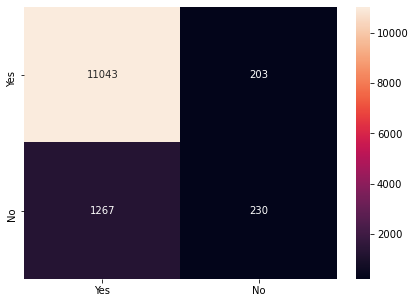

In [91]:
df_cmRF = pd.DataFrame(cmRF, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmRF, annot=True ,fmt='g')

In [92]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [rf_acc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.8828
0,Decision Tree,0.8827
0,Bagging,0.8832
0,Ada boost,0.8831
0,Gradient boost,0.8847
0,Random Forest,0.8846


*** Based onthe Above Gradient Boost is the best model to predict***